In [8]:
import matplotlib.pyplot as plt
import numpy as np


<CENTER>
<div style=width:500px;border-radius:10px;height:220px;background-color:#ffcccc;
     text-align:center;vertical-align:middle;>


<br>
<CENTER>
<font size=7, font color=navy> Méthodes numériques
</CENTER>
     <br>
<CENTER>
<font size=6, font color=navy>Equations différentielles
</CENTER>
</div>
</CENTER>

# MISE EN FORME

### Méthode d'Euler :
$$(E)\colon \;  X'=F(X,t) \text{ sur }I \text{ intervalle }$$
* A priori :
    * $F\colon \mathbb{R}^n \times I \rightarrow \mathbb{R}^n$    
    $\rightarrow$ Supposée continue
    * $X\colon I \rightarrow \mathbb{R}^n$    
    $\rightarrow$ Supposée dérivable.

### Exemples (scalaires - ordre 1).
* $y'=ty$ $\leadsto$ $F(y,t)=ty$
* $y'=y$ $\leadsto$ $F(y,t)=y$
* $y'-ty=\ln(t)$ $\leadsto$ $F(y,t)=ty+\ln(t)$

* Solution de $(E)$ : fonction $y$ dérivable sur $I$ telle que 
$$\forall t \in I,\; y'(t)=F(y(t),t)$$
* Construction de $F$ :    
$\leadsto$ On "oublie" que $y$ est une <b>fonction</b>   
$\leadsto$ devient une <b>variable</b>

In [ ]:
def f1(y,t):
    return t*y
def f2(y,t):
    return y
def f3(y,t):
    return t*y+np.ln(t)#numérique

### Exemples (vectorielles - ordre 1).
* $(x',y')=(2x-3y,y+5x)$    
$\leadsto$ $F((x,y),t)=(2x-3y,y+5x)$
* $(x',y')=(y^2-3\cos(t)xy,\sin(x+y+t)-t^2)$    
$\leadsto$ $F((x,y),t)=(y^2-3\cos(t)xy,\sin(x+y+t)-t^2)$

In [1]:
def F1(X,t):
    return (2*X[0]-3*X[1],X[1]+5*X[0])
def F2(X,t):
    return (X[1]**2-3*np.cos(t)*X[0]*X[1],np.sin(X[0]+X[1]+t)-t**2)

### Exemples (scalaires - ordre 2).
* $y''+y=0$    
$\leadsto$ On pose $X=(y,y')$ (2 termes)    
$\leadsto$ $X'=(y',y'')=(y',-y)$    
$\leadsto$ $(x_1',x_2')=(x_2,-x_1)$    
$\leadsto$ $F((x_1,x_2),t)=(x_2,-x_1)$
* $y''+2y'+y=e^t$     
$\leadsto$ $F((x_1,x_2),t)=(x_2,-x_1-2x_2+e^t)$
* $(t+1)y''+(y')^2+(t^2+1)y=t^3$     
$\leadsto$ $F((x_1,x_2),t)=(x_2,t^3-\frac{1}{1+t}((t^2+1)x_1+x_2^2))$

### Exemples (scalaires - ordre n).
* $y'''+\cos(t)y''+\sin(t)y'+y=e^t$    
$\leadsto$ $F((x,y,z),t)=(y,z,e^t-\cos(t)z-\sin(t)y-x)$
* $\sum\limits_{k=0}^n y^{(k)}=f(t)$    
$\leadsto$ $F((x_1,\dots, x_n),t)=(x_2,\dots, x_n,f(t)-\sum\limits_{k=0}^{n-1} x_k)$


### Exemple (vectorielles - ordre 2).
* $(x'',y'')=(t xy, x'y+y'x)$    
$\leadsto$ On pose $X=(x,x',y,y')=(x_1,x_2,x_3,x_4)$    
$\leadsto$ $X'=(x',x'',y',y'')=(x',txy,y',x'y+y'x)=(x_2,tx_1x_3,x_4,x_2x_3+x_4x_1)$    
$\leadsto$ $F((x_1,x_2,x_3,x_4), t)=(x_2,tx_1x_3,x_4,x_2x_3+x_4x_1)$
* $\dots$ et ainsi de suite    
$\dots$ pour des équations vectorielles d'ordre $n$

# ALGORITHME - METHODE D'EULER

### Paramètres constants
* $a<b$ définissant $[a,b]$
* Fonction $f$ dérivable sur $[a,b]$
* Valeur $X_0$ $\leftrightarrow$ $X(a)$.

$\leadsto$ <b>On discrétise les temps $t\in [a,b]$</b>

### 2 Types de paramètres en plus (outre f, a, b et X0)
* $n\in \mathbb{N}^\star$ : nombre de sous-intervalles de $[a,b]$    
$\leadsto$ tous de taille $\frac{b-a}{n}$    
$\leadsto$ subdivision $t_0=a<t_1=a+\frac{b-a}{n}<\dots < t_k=a+k\frac{b-a}{n}<\dots <t_n=b$
* $h>0$ : pas de la subdivision     
$\leadsto$ intervalles réguliers    
$\dots$ sauf le dernier $[a+\lfloor \frac{b-a}{h} \rfloor h, b]$   


$\dagger$ Parfois : donnée de $t_0=a$, $n$ et $h$ :     
$\leadsto$ $b=t_0+nh$ 

### Heuristique
$n\in \mathbb{N}^\star$
* $X_k$ $\leftrightarrow$ approximation de $X(t_k)$
* $t_{k+1} -t_k =h=\frac{b-a}{n}$ $\Rightarrow$ $t_{k+1}-t_k=h$
 $$X'(t_k)  \approx \frac{X(t_{k+1})-X(t_k)}{t_{k+1}-t_k} \approx \frac{X_{k+1}-X_k}{h}$$
* Equation $$F(X_k,t_k)= \approx \frac{X_{k+1}-X_k}{h}$$

$$
X_{k+1}=X_k+hF(X_k,t_k)
$$
$$
\text{Relation de récurrence}$$

### Types (retour)
* liste $\verb"[X"_0,\dots, \verb"X"_n\verb"]"$
* liste $\verb"[(t"_1,\verb"X"_1),\dots ,(\verb"t"_n,\verb"X"_n)\verb"]"$     
    $\leadsto$ peu inutile : on connaît les $t_k$ $\rightarrow$ calculables à part.
    
* Files ou Piles : inutiles    
$\leadsto$ Représentation graphique   
$\leftrightarrow$ liste

### Algorithme 
* Evident : 
    * boucle $\verb"for"$ (paramètre $n$)
    * boucle $\verb"while"$ (paramètre $h$)    
$\rightarrow$ suffit de <b>mettre à jour $(X,t)$</b> (représentant les $(X_k,t_k)$)    
$\dots$ A chaque tour de boucle

In [15]:
#Paramètre n
def Euler_nb(F,a,b,X0,n):
    h=(b-a)/float(n)
    t=a
    X=X0#Liste des valeurs approchées
    L=[X0]#Liste des temps
    T=[t]
    for i in range(n):#Mise à jour
        X=X+h*F(X,t)
        t=t+ h
        L=L+[X]
        T=T+[t]
    return L,T

In [41]:
#Paramètre h
def Euler_pas(F,a,b,X0,h):
    t=a
    X=X0#Liste des valeurs approchées
    L=[X0]#Liste des temps
    T=[t]
    while t+h<=b:#Mise à jour
        X=X+h*F(X,t)
        t=t+h
        L=L+[X]
        T=T+[t]
    X=X+(b-t)*F(X,t)
    t=b
    L=L+[X]
    T=T+[t]
    return L,T

In [4]:
#Paramètres t0, n et h
def Euler_ter(F,t0,X_0,n,h):
    t=t0
    X=X0
    L=[X0]
    #T=[t]
    for i in range(n):
        X=X+hF(X,t)
        t=t+h
        L=L+[X]
        #T=T+[t]
    return L#,T

### Remarque : polymorphisme
* Si opérations + et * ont le sens "attendu"    
$\leadsto$ les fonctions $\verb"Euler"$ s'appliquent !    
$\leadsto$ valable en scalaire <b>et</b> vectoriel
* Pour des vecteurs :    
$\rightarrow$ types $\verb"np.matrix"$ et $\verb"np.array"$ $\rightarrow$ OK !     
$\rightarrow$ types $\verb"list"$ et $\verb"tuple"$ : NON !

$\leadsto$ Fonctions <i>Polymorphes</i>    
$\rightarrow$ Changer les types en vectoriel    
$\dots$ $\verb"tuple"\to \verb"array"$

# EXEMPLES

### Exemple 1 : Exponentielle

$$\begin{cases}y'=y\\ y(0)=1\end{cases}$$
* Solution bien connue : $\exp$ !
* Sur $[0,6]$ (exemple) avec $n=200$

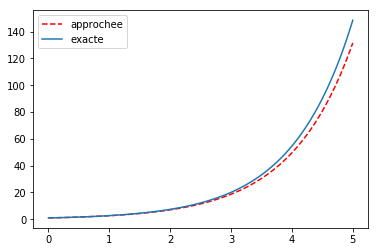

In [23]:
def F(y,t):return y
ordo,absc=Euler_nb(F,0,5,1,100)
plt.plot(absc,ordo,'r--',label='approchee')
#La vraie exponentielle
Vraie=map(lambda x:np.exp(x),absc);plt.plot(absc,Vraie,label='exacte')
plt.legend();plt.show()

$\rightarrow$ Cumul des erreurs ?

### Exemple 2 : Sinus

$$\begin{cases}
y''+y=0\\
y(0)=0\\
y'(0)=1
\end{cases}$$
* Solution bien connue : $\sin$ !
* Sur $[0,\pi]$ (exemple) avec $h=0,02$ (exemple)

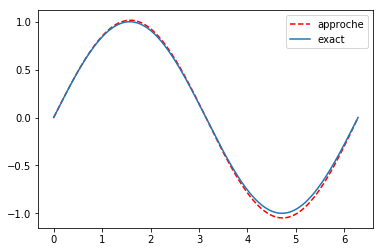

In [45]:
def F(X,t):return np.array([X[1],-X[0]])#Type compatible avec le polymorphisme !
yyprime,absc=Euler_pas(F,0,2*np.pi,np.array([0,1]),.02)
ordo=[elt[0] for elt in yyprime]
plt.plot(absc,ordo,'r--',label='approche')
#Le vrai sinus
Vraie=map(lambda x:np.sin(x),absc);plt.plot(absc,Vrai,label='exact')
plt.legend();plt.show()

$\rightarrow$ Compensation des erreurs ?

### Exemple 3 : Lotka-Volterra
$\rightarrow$ Système Proies-Prédateurs    
$\rightarrow$ $x\; \leftrightarrow$ proies ; $y\; \leftrightarrow$ prédateurs
$$
\left\{   \begin{array}{lcrcrr}  x'&=&x&-&0,1xy&=x(\alpha-\beta y)
\\y'&=&-2y&+&0,4xy &=-y(\delta-\gamma x)  \end{array}  \right.
$$
* $\alpha$ : taux de reproduction des proies en l'absence de prédateur
* $\beta$ : taux de mortalité des proies par rencontre avec les prédateurs
* $\delta$ : taux de mortalité des prédateurs en l'absence de proie
* $\gamma$ : taux de reproduction des prédateurs en fonction des proies mangées.
* <b>Système Autonome</b> : variable $t$ absente    
$\leadsto$ Peu importe le temps de départ $t_0$    
$\rightarrow$ Evolution $y$ par rapport $x$    
$\rightarrow$ Portrait de phase    

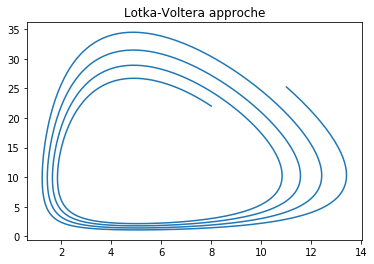

In [47]:
def F(X,t):return np.array([X[0]-.1*X[0]*X[1],-2*X[1]+.4*X[0]*X[1]])
Rep,absc=Euler_nb(F,0,20,np.array([8,22]),1000)
XX,YY=[elt[0] for elt in Rep],[elt[1] for elt in Rep]
plt.plot(XX,YY); plt.title('Lotka-Voltera approche');plt.show()

$\rightarrow$ Solution apparemment non-périodique

Calcul exact pour les conditions initiales :
    $$(x(0),y(0))=(8,22),\;  (x(0),y(0))=(7,7)\text{ et }(x(0),y(0))=(11,6)$$

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


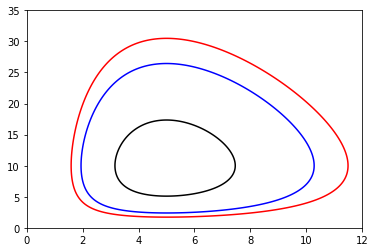

In [51]:
h = 0.01;valeursx = np.arange(0,12,h);valeursy = np.arange(0,35,h) #borne droite exclue
X, Y = np.meshgrid(valeursx,valeursy,)#Treillis ou réseau
F = 0.4*X+0.1*Y-2*np.log(X)-np.log(Y);G1 = 0.4*8+0.1*22-2*np.log(8)-np.log(22);G2 = 0.4*7+0.1*7-2*np.log(7)-np.log(7);G3 = 0.4*11+0.1*6-2*np.log(11)-np.log(6) #Différentes valeur initiales
plt.contour(X, Y, (F - G1), [0],colors='b');plt.contour(X, Y, (F - G2), [0],colors='k');plt.contour(X, Y, (F - G3), [0],colors='r')#(x(0),y(0))=(11,6)

$\rightarrow$ Erreurs probables dans Euler    
$\rightarrow$ Se propagent !

# AUTRES METHODES

### Euler Implicite 
* Approximation
$$
X'(t_{k+1})\approx \frac{1}{t_{k+1}-t_k}\left( X(t_{k+1})-X(t_k) \right)
$$
* On pose :
$$ X_{k+1}=X_k+hF(X_{k+1},t_{k+1})
$$

$\leadsto$ Nécessite de résoudre l'équation implicite
$$\Phi_k(x)=x-X_k-hF(x,t_{k+1})=0$$

$\rightarrow$ Dichotomie    
$\rightarrow$ Euler

### Moyenne Euler Explicite-Implicite
* Nom : Crank-Nicholson (se sont mis à deux !)
* On pose :
$$  X_{k+1}=X_k+\frac{h}{2}\left( F(X_{k+1},t_{k+1})+F(X_{k},t_{k})\right)
$$

$\leadsto$ Pas plus efficace pour compenser les erreurs    
$\leadsto$ Reste implicite

### Runge-Kutta d'ordre 2 (RK2)
* Point au milieu $t_k+\frac{h}{2}$
* A peu près Euler explicite 
$$X_{k+\frac{1}{2}}=X_k+\frac{h}{2} F(X_k,t_k)$$
* Estimation Dérivée :
$$X'(t_k+\frac{h}{2})\approx F(X_{k+\frac{1}{2}},t_k+\frac{h}{2})$$
* Avec $X'(t_{k+1})\approx X'(t_k+\frac{h}{2})\approx \frac{1}{t_{k+1}-t_k}\left( X_{k+1}-X_k \right)$ :
$$
X_{k+1}=X_k+hF\left(X_k+\frac{h}{2} F(X_k,t_k),t_k+\frac{h}{2}\right)
$$


$\leadsto$ Schéma prédicteur-correcteur 

### Runge-Kutta d'ordre 2 (RK2)
* Hybride et itératif avec points médians $\leftrightarrow$ RK2 généralisé
$$X_{k+1}=X_k+\frac{h}{6}\left(  \underbrace{F(X_k,t_k)}_{=T_1}+ 2\underbrace{F(X_k+\frac{h}{2}T_1,t_k+\frac{h}{2})}_{=T_2}+2\underbrace{F(X_k+\frac{h}{2}T_2,t_k+\frac{h}{2})}_{=T_3}+F(X_k+hT_3,t_k+t_{k+1})\right)$$

$\leadsto$ RKn (ou RK2n ou même RK$2^k$)    

$\leadsto$ Lien fort avec les <b>méthodes de quadrature</b>    
    $\rightarrow$ c.f. Poly

# CONVERGENCE DES METHODES
## TOTALEMENT H.P. !!!

# EXEMPLES SIMPLES

### Exp


$$\begin{cases}y'=y\\ y(0)=1\end{cases}$$
* Pour $k \in [\! | 0, n-1|\! ]$,: $X_{k+1}=X_k+hX_k=(1+h)X_k$. Par une $\rightarrow$  $\forall k \in [\! | 0, n-1|\! ]$ $$ X_k=(1+h)^nX_0=(1+h)^n$$
* Intervalle d'approximation  $[0,T]$ fixé ($T>0$) $$y(t_n)\approx X_n= \left( 1+\frac{T}{n} \right)^n$$
* $\lim\limits_{n\to+\infty} e^T$

### Sommes de Riemann

* $f\in \mathcal{C}^1([a,b],\mathbb{R})$ $$\begin{cases}y'=f(t)\\ y(a)=0\end{cases}$$
$\rightarrow$ unique primitive de $f\colon t\mapsto \int_a^t f(u){\rm d} u$
* $\forall k \in [\! | 0, n-1|\! ]$, 
$$X_{k+1}=X_k+f(t_k)=X_k+f(a+k\frac{b-a}{n})$$
* Téléscopage :  $$y(b)=y(t_n)\approx X_n=\sum\limits_{k=0}^{n-1} f(a+k\frac{b-a}{n})$$
$\leadsto$ Somme de Riemann    
$\leadsto$ $\int_a^b f(u){\rm d} u$.

    * Méthode d'Euler $\leftrightarrow$ Méthode des rectangles.

Autres liens : méthodes de quadrature !